<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Bank Customer Churn Analysis and Model Prediction </b></div>

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<div style="font-family:Calibri;background-color:'#DEB887'; padding:30px; font-size:17px">



<b>  Problem Statement:</b><br>
    
1. Despite ongoing efforts by banks to attract and retain customers, the banking industry continues to struggle with customer churn, resulting in financial losses and decreased customer satisfaction.<br>
2. It is advantageous for banks to know what leads a client towards the decision to leave the company.<br>
    <br>

<b>Project Objective:-</b> 

1. The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.<br>
2. After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.<br>
3. In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.<br>
<br>

<b>  Project Overview:</b><br>

1. <b>Churn refers</b> to customers leaving a bank or discontinuing their banking services.<br>
2. <b>Banking Churn Analysis</b> is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.<br>
3. <b>Banking Churn Modeling</b> aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.<br></div>

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Importing all the necessary libraries </b></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Loading the Data</b></div>

In [2]:
df = pd.read_csv('bank_churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Basic Details of the Data</b></div>

### 1. Shape of the Dataset

In [4]:
print(f"Total number of rows in the dataset is {df.shape[0]}")
print(f"Total number of columns in the dataset is {df.shape[1]}")

Total number of rows in the dataset is 10000
Total number of columns in the dataset is 14


### 2. Columns of the Dataset

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Row Number: unique identifier to each record 
* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer, which can be relevant for analysing churn behaviour
* Exited: Whether the customer has churned (1 = yes, 0 = no)

### 3. Basic info about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Out of **14 features, 11 are numerical** and **3 are categorical**

### 4. Count of Unique values

In [7]:
df.nunique().to_frame().rename(columns ={0 :"Count of unique values"})

,Count of unique values
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


### 5. Descriptive Statistics

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Surname column** has **high cardinality** and it wont be relevant for predicting bank customer churn. So, can drop it
* **Geography, Gender** has **low cardinality** and we can use encoding techniques and it seems relevant for predicting bank customer churn

### 6. Checking for Null Values

In [10]:
df.isnull().sum().to_frame().rename(columns ={0 : "count of null values"})

,count of null values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **No Null values** are present in the dataset

### 7. Checking for Duplicates

In [11]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **No Duplicate records** in the dataset

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Data Wrangling</b></div>

* **Data wrangling (also known as data munging)** is the process of **cleaning, transforming, and organizing** raw data into a more usable format for analysis or modeling

In [12]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3111,3112,15657163,Cockrum,623,Germany,Male,42,1,149332.48,2,1,0,100834.22,0
7709,7710,15574119,Okwuadigbo,598,Spain,Female,64,1,62979.93,1,1,1,152273.57,0
9834,9835,15799358,Vincent,516,France,Female,46,6,62212.29,1,0,1,171681.86,1
774,775,15789158,Nikitina,636,Germany,Male,49,6,113599.74,2,1,0,158887.09,1
4959,4960,15784361,Williamson,543,Spain,Female,46,5,140355.60,1,1,1,85086.78,0
6805,6806,15577988,Skinner,614,France,Female,35,1,0.00,2,1,1,3342.62,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Columns **RowNumber, CustomerId, Surname** has **high cardinality** and these are not relevant for predicting customer churn. So, can drop them

#### Dropping the features

In [13]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

---

### Renaming the Target feature i.e. Exited 

In [14]:
df.rename(columns = {'Exited' : 'Churned'}, inplace = True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Exploratory Data Analysis</b></div>

## 1. Visualizing Target Variable

In [16]:
print(f"Percentage of customers churned rate is {round(len(df[df['Churned'] == 1])/len(df) * 100,2)}%")
print(f"Percentage of customers retained is {round(len(df[df['Churned'] == 0])/len(df) * 100,2)}%")

Percentage of customers churned rate is 20.37%
Percentage of customers retained is 79.63%


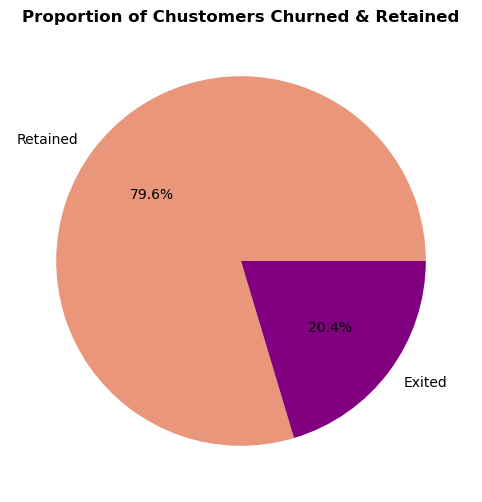

In [17]:
rate = df['Churned'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,2)
plt.pie(rate.values, labels = ['Retained', 'Exited'], autopct="%1.1f%%", colors=["darksalmon", "purple"])
plt.title("Proportion of Chustomers Churned & Retained", fontweight = 'black')

plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* It is **highly Imbalanced** dataset. So we need to perform **over sampling technique** from **SMOTE**

---

## 2. Visualization of Target variable with Geography column

In [18]:
df['Churned'] = df['Churned'].astype(str)

In [19]:
def countplot(column):
    plt.figure(figsize=(12,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="magma", width = 0.5)
    for i in ax.containers:
        ax.bar_label(i)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

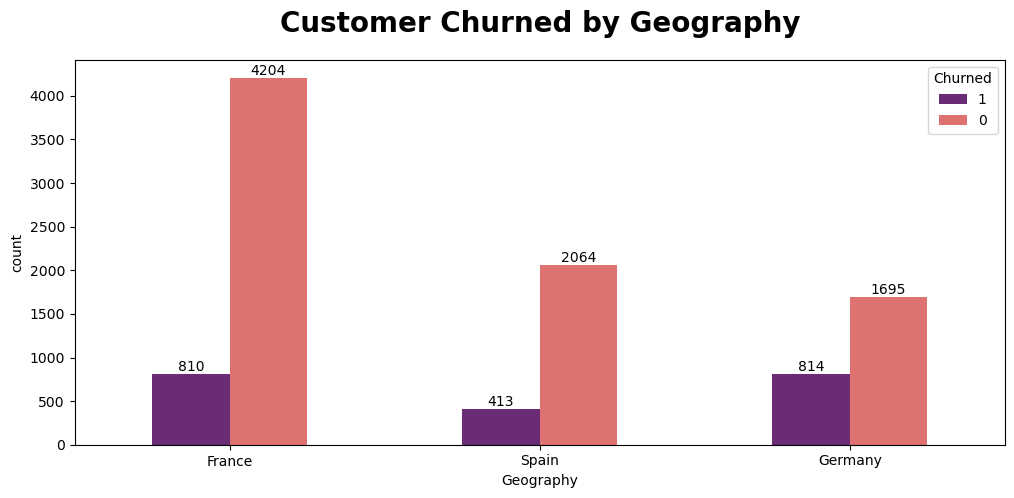

In [20]:
countplot("Geography")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Half of the customers** belongs to **France** followed by **equal proportion** of customers from **Spain and Germany**
* Despite the huge total customer difference between France and Germany, **count of churned customers** are almost equal in **France and Germany**
* There are **almost equal customers** from **Spain and Genrmany**, but the churned rate is **almost double in Germany** when **compared to Spain**

<h3 align="left"><font color=blue>Recommendations:</font></h3>

* Bank can analyse the customers behaviour and banking facilities from France and can implement the same on Germany customers

---

## 3. Visualization of Target variable with Gender column

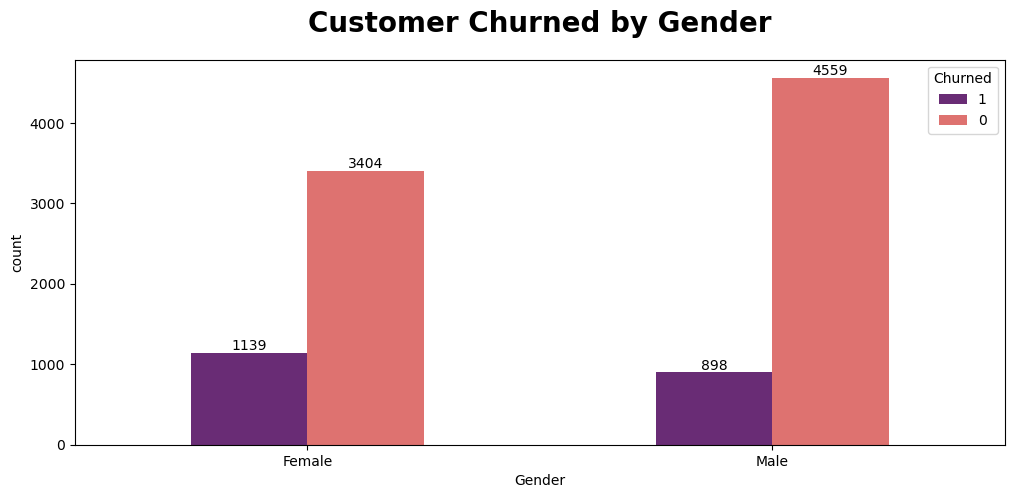

In [21]:
countplot("Gender")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The churned probability for **female customers is higher than male customers** which means that female customers are more who are deactivating the banking facilities

<h3 align="left"><font color=blue>Recommendations:</font></h3>

* Bank can develop **targeted market campaign for female customers** and also focusing on **enhancing the overall customer experience** for **female customers**

---

## 4. Visualization of Target variable with HasCrCard

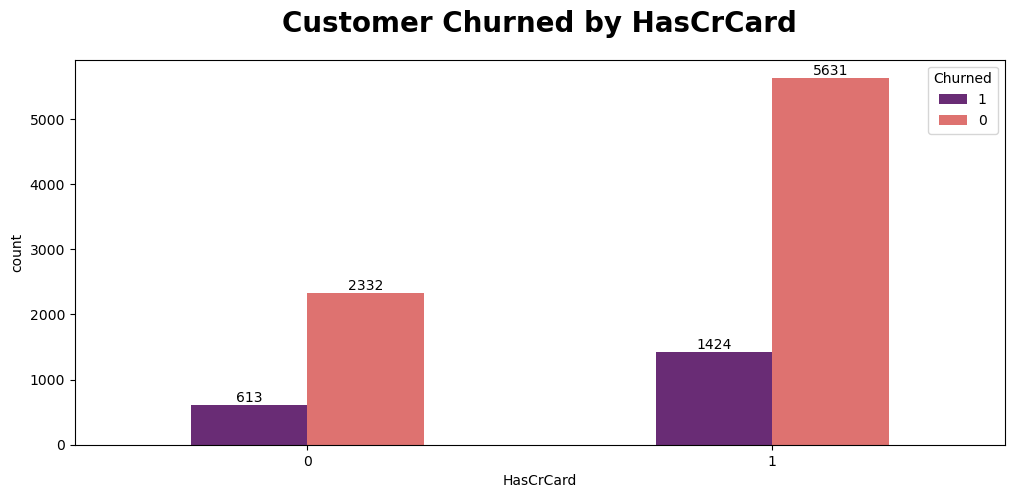

In [22]:
countplot("HasCrCard")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Almost **80%** of the customers are having credit card. The churn probability of both the categories are almost the same.
* There's **no affect of credit card on the churn of customers.**



---

## 5. Visualization of Target variable with Is ActiveMember

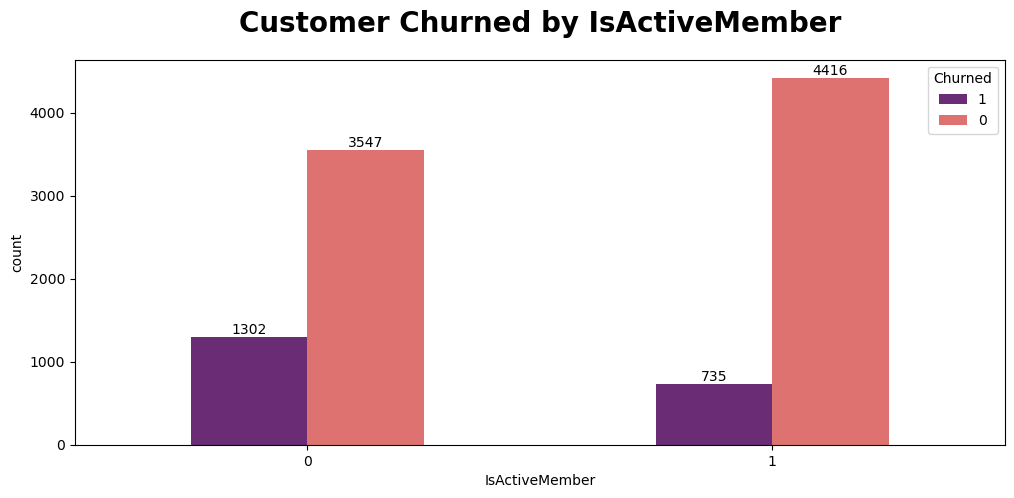

In [23]:
countplot("IsActiveMember")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The **customer count** for both the categories (active and not active) are **almost same**
* The **churn count is high** for the customers **who are not active** when compared to who are active. Its almost double

<h3 align="left"><font color=blue>Recommendations:</font></h3>

*  banks can implement a **variety of strategies like regular communication and updates, incentive programs** to re-engage these customers and reduce the likelihood of them leaving.

---

## 6. Visualization of Target variable with Is NumOfProducts

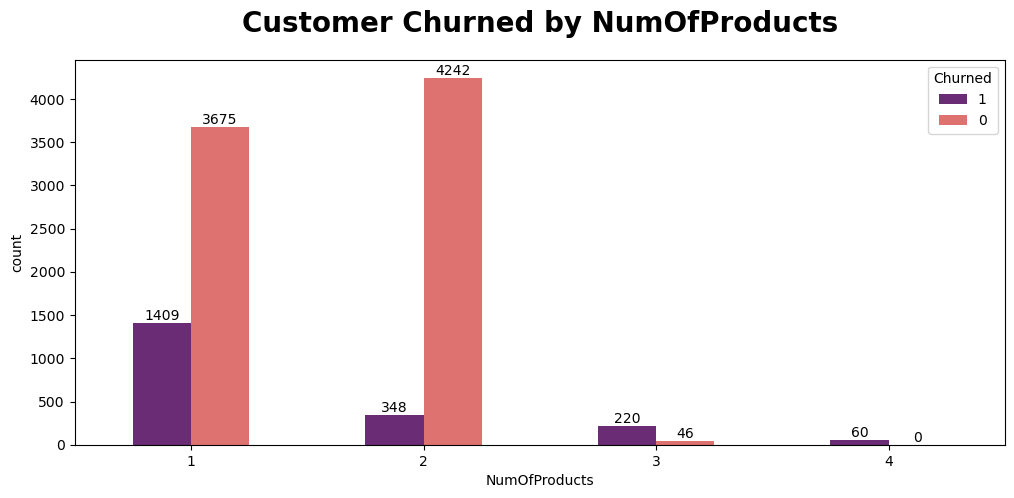

In [24]:
countplot("NumOfProducts")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Most of the customers are **having 2 banking products and 1** and **very few having more than 2**
* The **customer churn rate is higher** for the customers who are having only **1 product and 2 banking products**
* Out of overall customers considered, the customers who are having 2 banking products churn rate is less

<h3 align="left"><font color=blue>Recommendations:</font></h3>

* Bank can try to **convince the customers to have atleast 2 banking products** by providing **reward, beneifts, offers**

---

## 7. Visualization of Target variable with Tenure

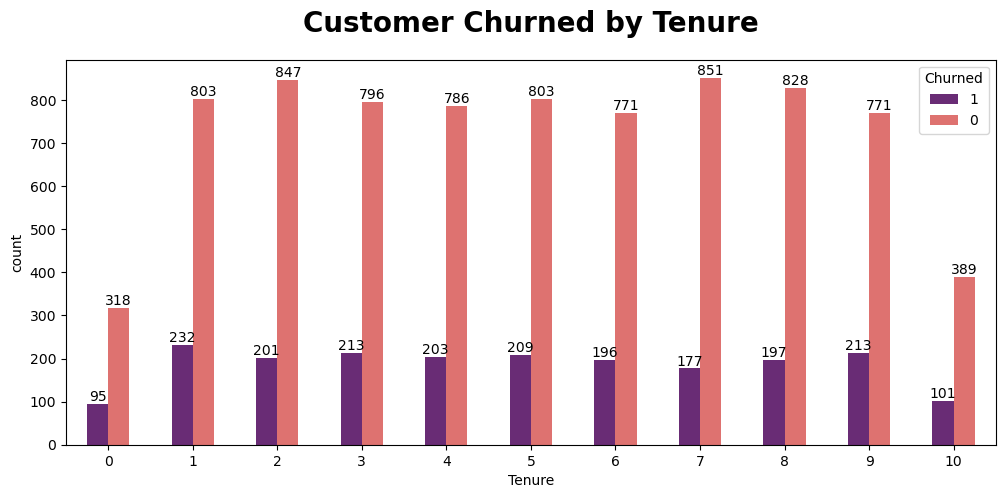

In [25]:
countplot("Tenure")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The **highest tenure is 10 years** means that there are customers who have **opened bank account 10years ago**
* For each year, **the distribution of churn rate is almost same**, so cant make specific inference



---

## 8. Visualization of Target variable with Credit Score

In [26]:
def continuous(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x= df[col], hue = df['Churned'], kde = True, palette="magma")
    plt.title(f"Distribution of {col} with Churn Status", fontweight = 'black')

    plt.subplot(1,2,2)
    sns.boxplot(x = df['Churned'], y = df[col])
    plt.title(f"Distribution of {col} with Churn Status",  fontweight = 'black')
    plt.show()

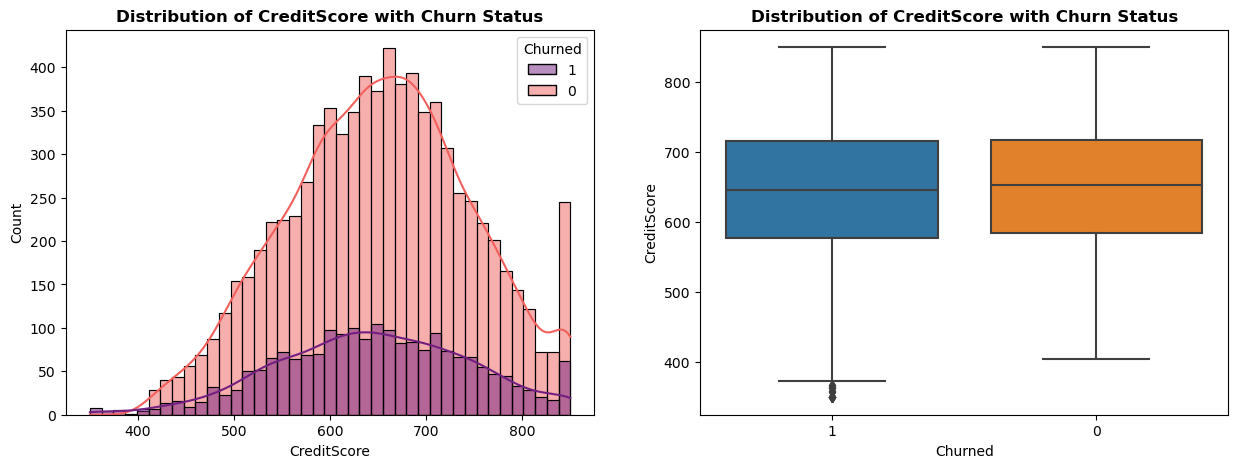

In [27]:
continuous("CreditScore")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The **median credit score** for both **churned customers and not churned** are **almost equal**. Since its almost equal, we cant make any general inference apart from this


---

## 9. Visualization of Target variable with Age

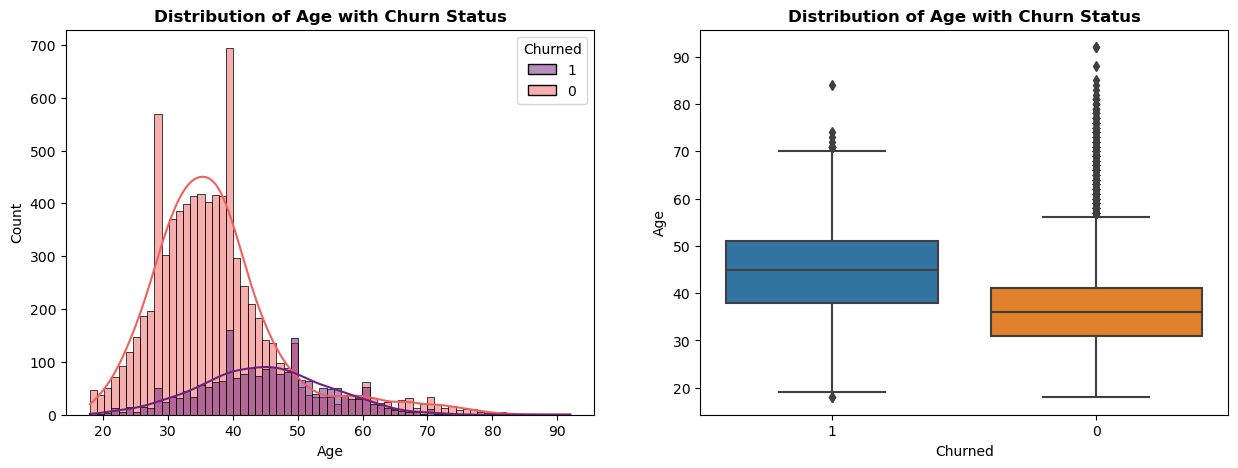

In [28]:
continuous("Age")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The distribution is **right skewed** due to the **presence of outliers** which may **lead to overfiting** of the model.
* We can perform **log normal transformation** technique to bring to a normal distribution.

---

## 10. Visualization of Target variable with Balance

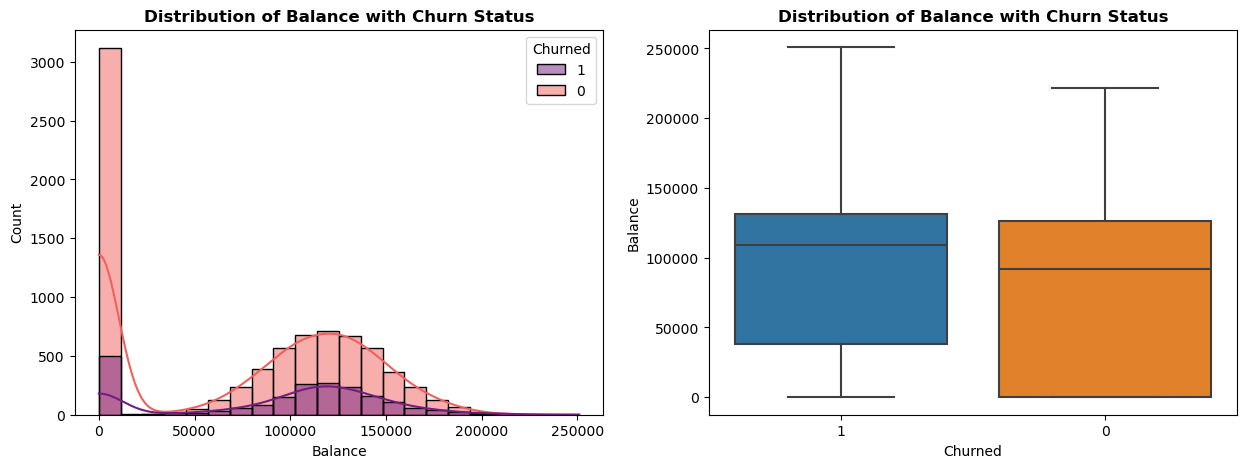

In [29]:
continuous("Balance")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Almost **3000 customers** are having their **account balanace** of amount **equal to 0**
* customers with **zero account balance** are more likely to **deactivate their account**
* **Apart from those customers**, we can observe **normal distribution**. So no need to apply any techniques.

---

## 11. Visualization of Target variable with Estimated Salary

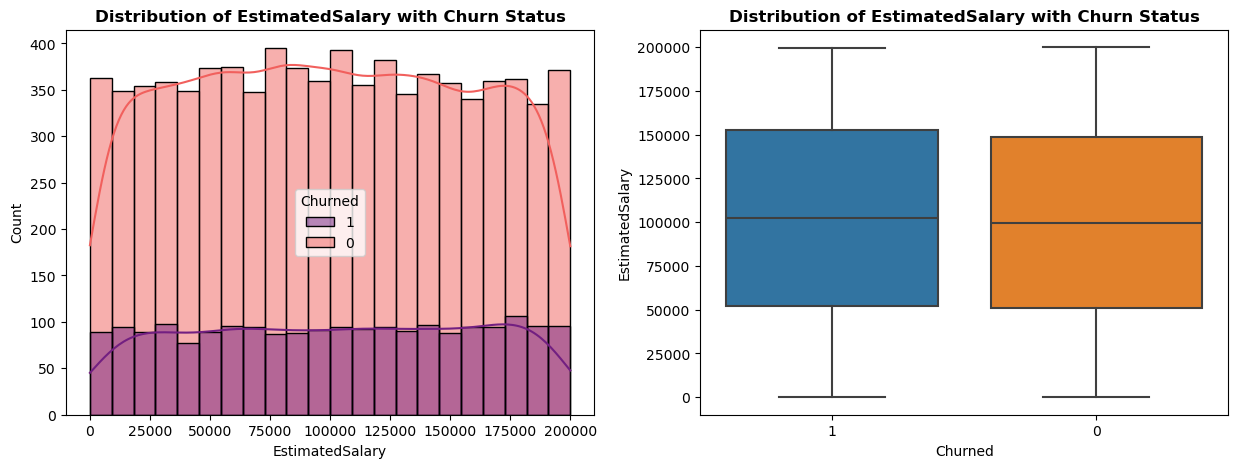

In [30]:
continuous("EstimatedSalary")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Distribution and median values** of EstimatedSalary for both the churned categories are **almost same**.
* We cant make any relevant inference due to same kind of distribution.

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Feature Engineering</b></div>

### 1. Creating new feature from "Num Of Products"

In [31]:
condition = [(df['NumOfProducts'] == 1), (df['NumOfProducts'] == 2), (df['NumOfProducts'] > 2)]
values = ["One Product", "Two Products", "More than Two products"]

In [32]:
df["Total_Products"] = np.select(condition, values)

In [33]:
df.drop(columns = 'NumOfProducts', inplace = True)

#### Visualizing Total Products

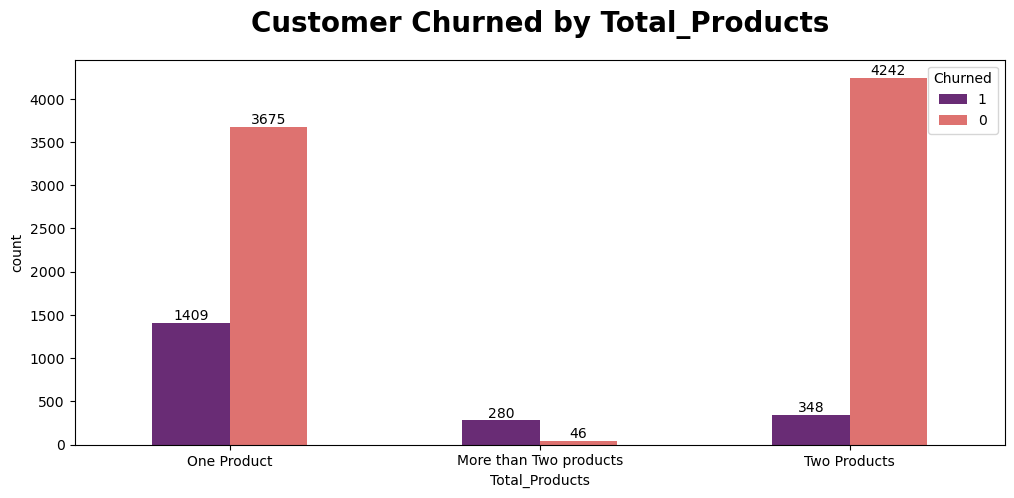

In [34]:
countplot("Total_Products")

---

### 2. Creating new feature from "Balance"

In [35]:
condition = (df['Balance'] == 0, df['Balance'] > 0)
values = ['Zero balance', 'More than zero balance']

In [36]:
df['Account_balance'] = np.select(condition, values)

In [37]:
df.drop(columns = 'Balance', inplace = True)

### Visualizing Account Balance

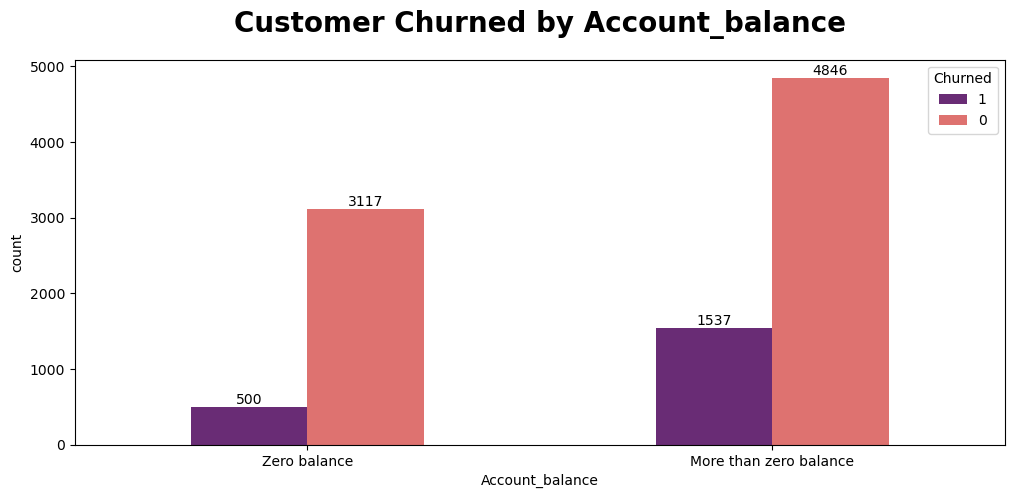

In [38]:
countplot('Account_balance')

---

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b> Data preprocessing</b></div>

### Unique values of the categorical columns

In [39]:
cat_cols = ['Geography', 'Gender', 'Total_Products', 'Account_balance']

In [40]:
for col in cat_cols:
    print(f"Unique values in {col} column is :", df[col].unique())
    print("-"*50)

Unique values in Geography column is : ['France' 'Spain' 'Germany']
--------------------------------------------------
Unique values in Gender column is : ['Female' 'Male']
--------------------------------------------------
Unique values in Total_Products column is : ['One Product' 'More than Two products' 'Two Products']
--------------------------------------------------
Unique values in Account_balance column is : ['Zero balance' 'More than zero balance']
--------------------------------------------------


### One Hot Encoding on Categorical Columns

In [41]:
df = pd.get_dummies(columns = cat_cols, data = df)

In [42]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More than Two products,Total_Products_One Product,Total_Products_Two Products,Account_balance_More than zero balance,Account_balance_Zero balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


In [43]:
df = df.astype(int)

In [44]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More than Two products,Total_Products_One Product,Total_Products_Two Products,Account_balance_More than zero balance,Account_balance_Zero balance
0,619,42,2,1,1,101348,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084,0,0,0,1,1,0,0,1,0,1,0


---

### Skewness of continuous features

In [45]:
cols = ['CreditScore', 'Age', 'EstimatedSalary']

In [46]:
df[cols].skew().to_frame().rename(columns = {0: 'Feature Skewness'})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Age feature is **highly right skewed distribution**, which says that there is presence of **positive outliers**
* We can perform **Log Normal tranformation** to this column to achieve **Normal Distribution**.

---

### Applying Log transformation on Age column

In [47]:
old_age = df['Age']

In [48]:
df["Age"] = np.log(df["Age"])

### Visualizing Age column before and after Transformation

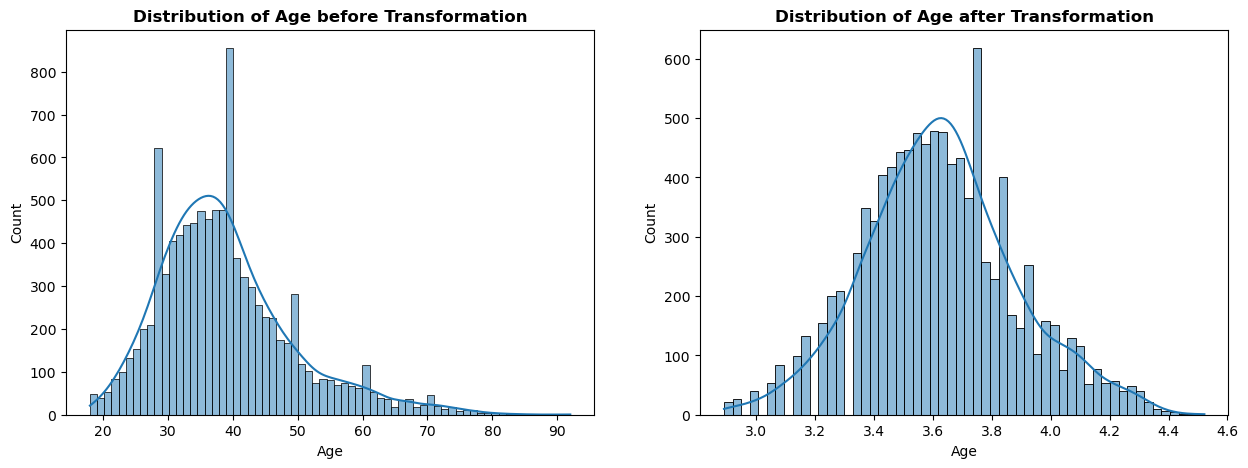

In [49]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(old_age, kde = True)
plt.title("Distribution of Age before Transformation", fontweight = 'black')

plt.subplot(1,2,2)
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Age after Transformation", fontweight = 'black')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* After **applying Log Transformation**, we have **achieved Normal distribution** for Age feature.


### Creating a copy of dataset

In [50]:
df1 = df.copy()

### Splitting the data into independent & Dependent features

In [51]:
x = df1.drop(columns = ['Churned'])
y = df1['Churned']

In [52]:
print(x.shape)
print(y.shape)

(10000, 16)
(10000,)


### Splitting the dataset into train and test

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Handling imbalance dataset - Applying SMOTE 

In [54]:
from imblearn.over_sampling import SMOTE

x_train_resample, y_train_resample = SMOTE().fit_resample(x_train, y_train)

In [55]:
print(x_train_resample.shape, y_train_resample.shape)

(12712, 16) (12712,)


### Scaling the features

In [56]:
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train_resample)
X_test = scaler.transform(x_test)

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b>Model Building & Evaluation</b></div>

In [57]:
##X_train,y_train_resample,X_test,y_test

## 1. Decision Tree

#### Performing GridSearchCV to find the best Parameters for the model

In [58]:
DT = DecisionTreeClassifier()

In [59]:
parameters = {"max_depth":[4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None]}

In [60]:
GridSearch_DT = GridSearchCV(DT, param_grid = parameters, cv = 5, n_jobs = -1)

GridSearch_DT.fit(X_train, y_train_resample)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

---

#### Fetching the best parameters for the model

In [61]:
best_parameters_DT = GridSearch_DT.best_params_

print("Best parameters for the DecisionTree model is :\n\n")
best_parameters_DT

Best parameters for the DecisionTree model is :




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'random'}

---

#### Creating Decision Tree model with the best parameters

In [62]:
DT = DecisionTreeClassifier(**best_parameters_DT)

DT.fit(X_train, y_train_resample)

DecisionTreeClassifier(max_depth=10, min_samples_split=7, splitter='random')

---

#### Model Accuracy & performance evaluation

In [106]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

print("Accuracy score of the model on Training data is:-", round(accuracy_score(y_train_resample, y_train_pred)*100,2),"%")
print("Accuracy score of the model on Testing data is:-", round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy score of the model on Training data is:- 90.43 %
Accuracy score of the model on Testing data is:- 84.95 %


In [107]:
print("Precision Score of the model is:-", round(precision_score(y_test, y_test_pred,average= 'micro')*100,2),"%")
print("Recall Score of the model is:-", round(recall_score(y_test, y_test_pred,average= 'micro')*100,2),"%")
print("F1 Score of the model is:-", round(f1_score(y_test, y_test_pred,average= 'micro')*100,2),"%")

Precision Score of the model is:- 84.95 %
Recall Score of the model is:- 84.95 %
F1 Score of the model is:- 84.95 %


#### Feature importance

In [65]:
imp_features = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":DT.feature_importances_}).sort_values(by = 'Importance', ascending = False)

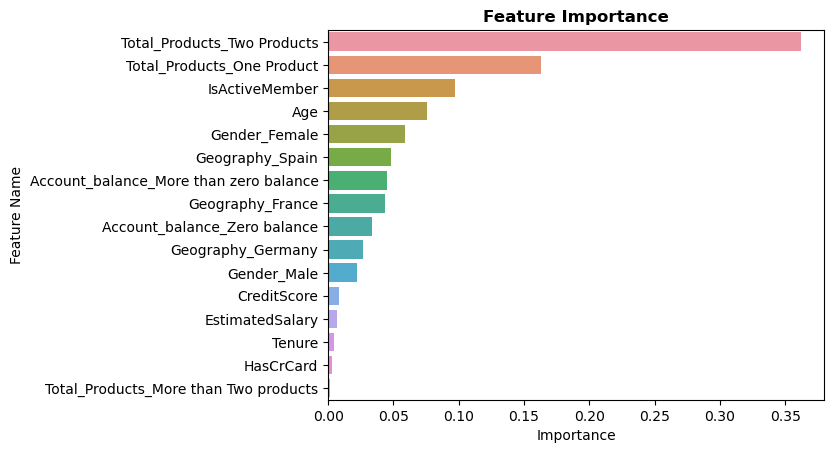

In [66]:
#plt.figure(figsize = (10,5))
sns.barplot(data = imp_features, x = "Importance", y = "Feature Name")
plt.title("Feature Importance", fontweight = 'black')
plt.show()
           

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **Total Products, Age, IsActiveMember, Account Balance, Geography, Gender** has **high significance** influence on customers deactivating their bank account
* Features **Tenure, Estimated Salary, HasCrCard, Credit Score** has **low significance** influence on customers deactivating their bank account

---

### Model Evaluation using Confusion Matrix

[[1520   87]
 [ 214  179]]


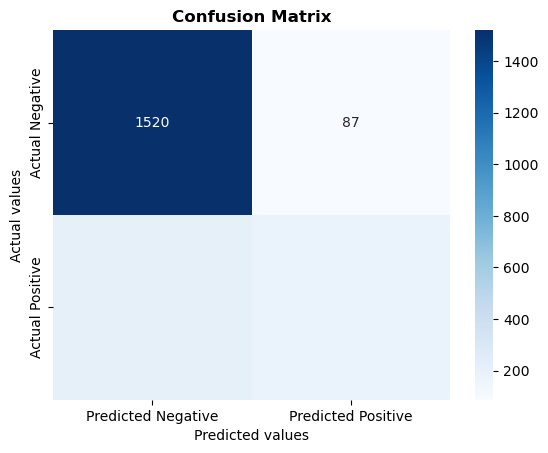

In [67]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
#plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d', xticklabels = ['Predicted Negative', 'Predicted Positive'],yticklabels = ['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix", fontweight = 'black')
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **True Negatives (TN) = 1491:** These are the cases where the model **correctly predicted the negative class** (correctly predicted customers who did not churn).
* **False Positives (FP) = 116:** These are the cases where the model **incorrectly predicted the positive class** (incorrectly predicted customers would churn, but they did not). Also known as a **Type I error**. This might lead to unnecessary actions, such as offering incentives to retain customers who were not at risk of churning.
* **False Negatives (FN) = 191:** These are the cases where the model **incorrectly predicted the negative class** (incorrectly predicted customers would not churn, but they did). Also known as a **Type II error**. These are more concerning because the business might miss opportunities to retain these customers
* **True Positives (TP) = 202:** These are the cases where the model **correctly predicted the positive class** (correctly predicted customers who did churn).

### Evaluating ROC-AUC Curve

In [68]:
from sklearn.metrics import roc_curve, auc

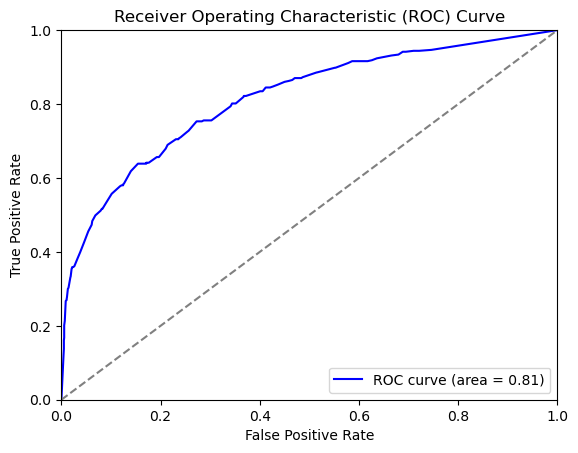

In [84]:
y_pred_proba = DT.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* An AUC curve of **0.82** says that the model has **good discriminative power**
* This suggests that the model is **quite good at distinguishing** between the **positive class & negative class**
* An **AUC of 0.82** means that if you randomly select one customer who churned and one customer who did not, your model has an **82% chance of correctly ranking the churned customer higher than the non-churned one** in terms of predicted probability.

## 2. Random Forest

In [70]:
RF = RandomForestClassifier()

In [75]:
parameters = {'n_estimators': [50,80,100,150],
              'min_samples_leaf': [4,5,6,7,8],
              'min_samples_split':[4,5,6,7,8],
              'max_depth':[4,6,8,10,12,16],
              'max_features':['auto', 'sqrt'],
              'criterion':['gini', 'entropy']}

In [76]:
grid_search_RF = GridSearchCV(RF,  param_grid = parameters, cv = 5)

grid_search_RF.fit(X_train, y_train_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 16],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [50, 80, 100, 150]})

---

#### Fetching the best parameters for the model

In [77]:
best_parameters_RF = grid_search_RF.best_params_
print("Best parameters for the RandomForest model is :\n\n")
best_parameters_RF

Best parameters for the RandomForest model is :




{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

---

#### Creating Random Forest model with the best parameters

In [78]:
RF = RandomForestClassifier(**best_parameters_RF)
RF.fit(X_train, y_train_resample)

RandomForestClassifier(max_depth=16, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=50)

---

### Model Accuracy & performance Evaluation

In [104]:
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

print("Accuracy score of Random Forest on training data:-", round(accuracy_score(y_train_resample, y_train_pred)*100,2))
print("Accuracy score of Random Forest on testing data:-", round(accuracy_score(y_test, y_test_pred)*100,2))

Accuracy score of Random Forest on training data:- 93.9
Accuracy score of Random Forest on testing data:- 86.3


In [105]:
print("Precision score of the model is:-", round(precision_score(y_test, y_test_pred,average= 'micro')*100,2))
print("recall score of the model is:-", round(recall_score(y_test, y_test_pred,average= 'micro')*100,2))
print("F1 score of the model is:-", round(f1_score(y_test, y_test_pred,average= 'micro')*100,2))

Precision score of the model is:- 86.3
recall score of the model is:- 86.3
F1 score of the model is:- 86.3


### Feature Importance

In [81]:
imp_features = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":RF.feature_importances_}).sort_values(by = 'Importance', ascending = False)

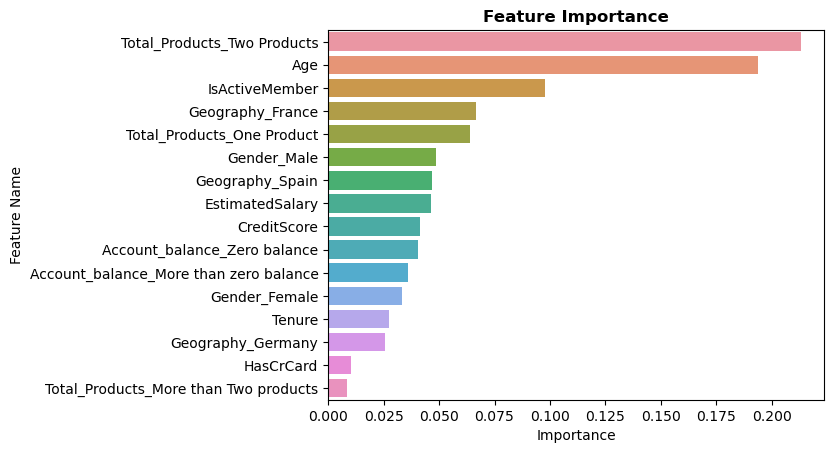

In [82]:
#plt.figure(figsize = (10,5))
sns.barplot(data = imp_features, x = "Importance", y = "Feature Name")
plt.title("Feature Importance", fontweight = 'black')
plt.show()
           

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **Total Products, Age, IsActiveMember, Account Balance, Geography, Gender, Estimated Salary, Credit Score** has **high significance** influence on customers deactivating their bank account
* Features **Tenure, HasCrCard** has **low significance** influence on customers deactivating their bank account

---

### Model Evaluation using Confusion Matrix

[[1518   89]
 [ 185  208]]


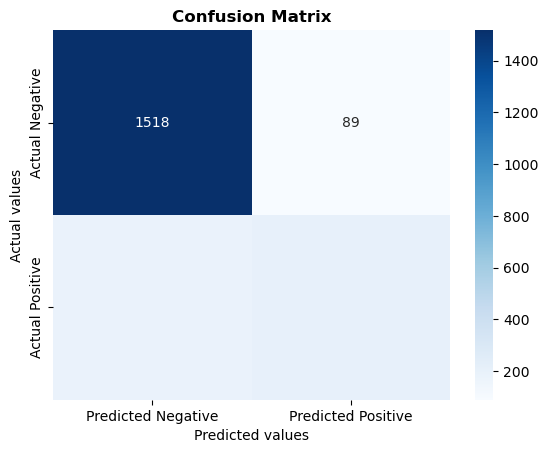

In [83]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
#plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d', xticklabels = ['Predicted Negative', 'Predicted Positive'],yticklabels = ['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix", fontweight = 'black')
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **True Negatives (TN) = 1581:** These are the cases where the model **correctly predicted the negative class** (correctly predicted customers who did not churn).
* **False Positives (FP) = 89:** These are the cases where the model **incorrectly predicted the positive class** (incorrectly predicted customers would churn, but they did not). Also known as a **Type I error**. This might lead to unnecessary actions, such as offering incentives to retain customers who were not at risk of churning.
* **False Negatives (FN) = 185:** These are the cases where the model **incorrectly predicted the negative class** (incorrectly predicted customers would not churn, but they did). Also known as a **Type II error**. These are more concerning because the business might miss opportunities to retain these customers
* **True Positives (TP) = 208:** These are the cases where the model **correctly predicted the positive class** (correctly predicted customers who did churn).

---

### Evaluating ROC-AUC Curve 

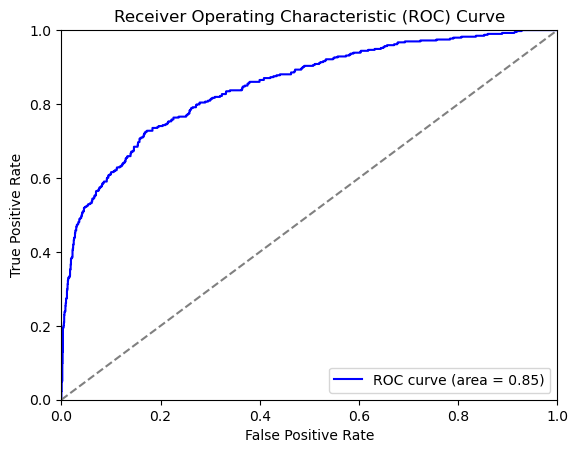

In [85]:
y_pred_proba = RF.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* An AUC curve of **0.85** says that the model has **good discriminative power**
* This suggests that the model is **quite good at distinguishing** between the **positive class & negative class**
* An **AUC of 0.85** means that if you randomly select one customer who churned and one customer who did not, your model has an **85% chance of correctly ranking the churned customer higher than the non-churned one** in terms of predicted probability.

### 3. XGBoost

In [86]:
xgb = XGBClassifier()

In [87]:
parameters = {'n_estimators': [150, 500, 800, 100],
               'learning_rate':[ 0.01, 0.1, 0.3],
               'max_depth': [20,30,40,50],
               'subsample': [0.3,0.5]}

In [88]:
grid_search_xgb = GridSearchCV(xgb, param_grid = parameters, cv = 5)

grid_search_xgb.fit(X_train, y_train_resample)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [20, 30, 40, 50],
                         'n_estimators': [150, 500, 800, 100],
                         'subsample': [0.3, 0.5]})

---

#### Finding the best parameters for the model

In [89]:
best_parameters_xgb = grid_search_xgb.best_params_
print("Best parameters for the XGB model is :\n\n")
best_parameters_xgb

Best parameters for the XGB model is :




{'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500, 'subsample': 0.3}

---

#### Creating XGB model with the best parameters

In [90]:
xgb = XGBClassifier(**best_parameters_xgb)
xgb.fit(X_train, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Accuracy & performance Evaluation

In [101]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print("Accuracy score of XGBoost on training data:-", round(accuracy_score(y_train_resample, y_train_pred)*100,2))
print("Accuracy score of XGBoost Forest on testing data:-", round(accuracy_score(y_test, y_test_pred)*100,2))

Accuracy score of XGBoost on training data:- 94.89
Accuracy score of XGBoost Forest on testing data:- 86.1


In [102]:
print("Precision score of the model is:-", round(precision_score(y_test, y_test_pred,average= 'micro')*100,2))
print("recall score of the model is:-", round(recall_score(y_test, y_test_pred,average= 'micro')*100,2))
print("F1 score of the model is:-", round(f1_score(y_test, y_test_pred,average= 'micro')*100,2))

Precision score of the model is:- 86.1
recall score of the model is:- 86.1
F1 score of the model is:- 86.1


### Feature Importance

In [95]:
imp_features = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":xgb.feature_importances_}).sort_values(by = 'Importance', ascending = False)

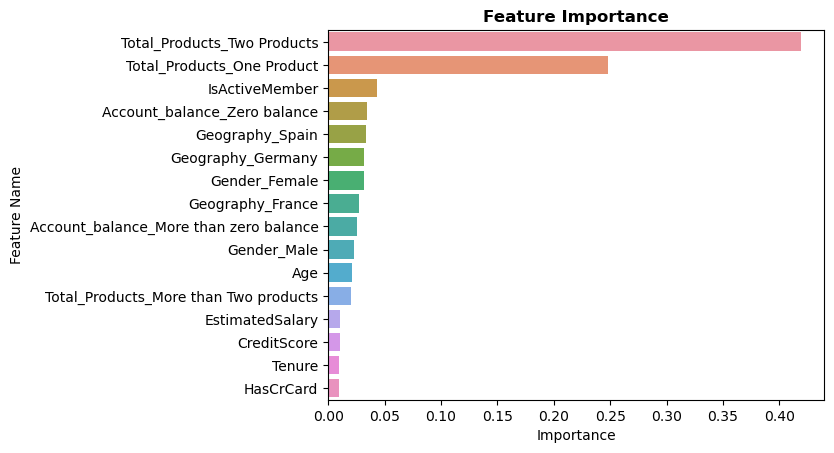

In [96]:
#plt.figure(figsize = (10,5))
sns.barplot(data = imp_features, x = "Importance", y = "Feature Name")
plt.title("Feature Importance", fontweight = 'black')
plt.show()
           

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Features **Total Products, IsActiveMember, Account Balance, Geography** has **high significance** influence on customers deactivating their bank account
* Features **Tenure, HasCrCard, Credit Score, Estimated Salary** has **low significance** influence on customers deactivating their bank account

---

### Model Evaluation using Confusion Matrix

[[1519   88]
 [ 190  203]]


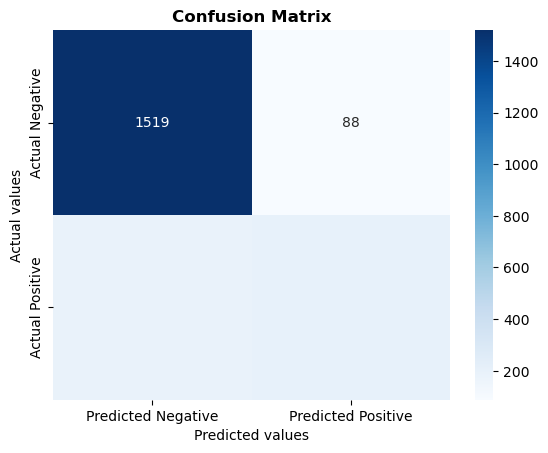

In [97]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
#plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt='d', xticklabels = ['Predicted Negative', 'Predicted Positive'],yticklabels = ['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix", fontweight = 'black')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **True Negatives (TN) = 1519:** These are the cases where the model **correctly predicted the negative class** (correctly predicted customers who did not churn).
* **False Positives (FP) = 88:** These are the cases where the model **incorrectly predicted the positive class** (incorrectly predicted customers would churn, but they did not). Also known as a **Type I error**. This might lead to unnecessary actions, such as offering incentives to retain customers who were not at risk of churning.
* **False Negatives (FN) = 190:** These are the cases where the model **incorrectly predicted the negative class** (incorrectly predicted customers would not churn, but they did). Also known as a **Type II error**. These are more concerning because the business might miss opportunities to retain these customers
* **True Positives (TP) = 203:** These are the cases where the model **correctly predicted the positive class** (correctly predicted customers who did churn).

---

### Evaluating ROC-AUC Curve

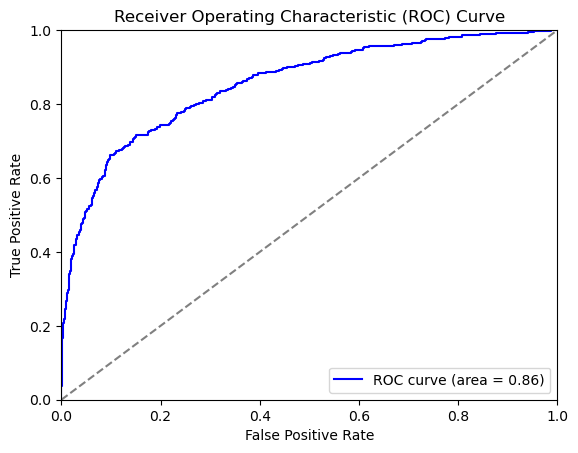

In [98]:
y_pred_proba = xgb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* An AUC curve of **0.86** says that the model has **good discriminative power**
* This suggests that the model is **quite good at distinguishing** between the **positive class & negative class**
* An **AUC of 0.86** means that if you randomly select one customer who churned and one customer who did not, your model has an **86% chance of correctly ranking the churned customer higher than the non-churned one** in terms of predicted probability.

<a id="1"></a>
# <div style="padding:20px;color:black;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:pink;overflow:hidden"><b>Conclusion</b></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Key Insights:</font></h3>

* The **main features** that significantly influence the bank customer churn are **Total Products, Geography, Age, IsActive Member, Gender**
  
* The model demonstrates a high level of accuracy, with **93% on training data and 86% on testing data,** indicating that it **performs well in predicting customer churn** for **both seen and unseen data**
  
* With **precision, recall, and F1 scores all around 86%**, the model demonstrates a balanced performance across different evaluation metrics, indicating that it is equally **good at identifying true churners and minimizing false predictions.**
  
* An **AUC score of 85%** indicates that the model has strong discriminative ability to **distinguish between customers who will churn and those who won’t.** The model correctly ranks a churner higher than a non-churner 85% of the time
  
* The model demonstrates **strong performance** across **multiple evaluation metrics**, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

<h3 align="left"><font color=blue>Recommendations:</font></h3>

* The **bank** can discuss with customers and convinve them to have atleast **two bank products** but **not less than 2**
* The **bank** can launch a scheme for **customers with higher ages (Senior Citizens)** so that they not deactivate their banking facilities.
* The **bank** can provide **Rewards and Incentive Programs,** Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilitie
